<a href="https://colab.research.google.com/github/tomasward/MLTeachingGeneral/blob/master/SVM_For_Teaching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
This is just experimental tinkering. This code I copied from Chris Albon's useful site. He shows how to visually explore the effects of the two parameters from the support vector classifier (SVC) when using the radial basis function kernel (RBF). Hiis tutorial draws heavily on the code used in Sebastian Raschka’s book Python Machine Learning. I edit this as I go. Here is Chris' original https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/

In [0]:
# Import packages to visualize the classifer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

# Import packages to do the classifying
import numpy as np
from sklearn.svm import SVC

### Visualisation piece
The code below is for plotting the classificaition regions

In [0]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

## Data Generation
I use the standard sklearn blob generator here rather than Chris' approach.  If you have forgotten your numpy see here https://numpy.org/devdocs/user/basics.indexing.html 


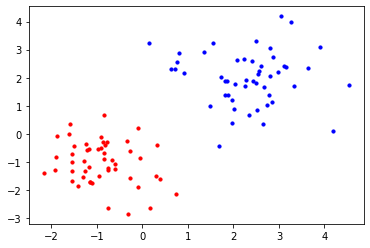

In [11]:
from sklearn.datasets import make_blobs

centers = [(-1, -1), (2, 2)]
cluster_std = [0.8, 1]

X, y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")

## Classify Using a Linear Kernel
The most basic way to use a SVC is with a linear kernel, which means the decision boundary is a straight line (or hyperplane in higher dimensions). Linear kernels are rarely used in practice, however I wanted to show it here since it is the most basic version of SVC. As can been seen below, it is not very good at classifying (which can be seen by all the blue X’s in the red region) because the data is not linear.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


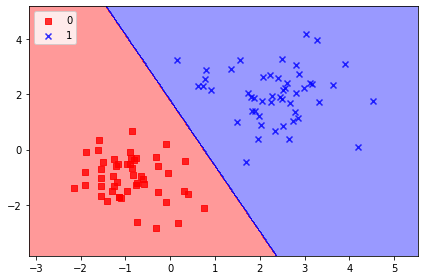

In [12]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='linear', C=1, random_state=0)
# Train the classifier & remember y_xor here are the target labels
svm.fit(X, y)

# Visualize the decision boundaries
plot_decision_regions(X, y, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Classify Using a RBF Kernel
Radial Basis Function is a commonly used kernel in SVC:

[INSERT EQUATION]

If this doesn’t make sense, Sebastian’s book has a full description. However, for this tutorial, it is only important to know that an SVC classifier using an RBF kernel has two parameters: gamma and C.

### Gamma
gamma is a parameter of the RBF kernel and can be thought of as the ‘spread’ of the kernel and therefore the decision region. When gamma is low, the ‘curve’ of the decision boundary is very low and thus the decision region is very broad. When gamma is high, the ‘curve’ of the decision boundary is high, which creates islands of decision-boundaries around data points. We will see this very clearly below.

### C
C is a parameter of the SVC learner and is the penalty for misclassifying a data point. When C is small, the classifier is okay with misclassified data points (high bias, low variance). When C is large, the classifier is heavily penalized for misclassified data and therefore bends over backwards avoid any misclassified data points (low bias, high variance).

### Gamma
In the four charts below, we apply the same SVC-RBF classifier to the same data while holding C constant. The only difference between each chart is that each time we will increase the value of gamma. By doing so, we can visually see the effect of gamma on the decision boundary.

**Gamma = 0.01**
In the case of our SVC classifier and data, when using a low gamma like 0.01, the decision boundary is not very ‘curvy’, rather it is just one big sweeping arch.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


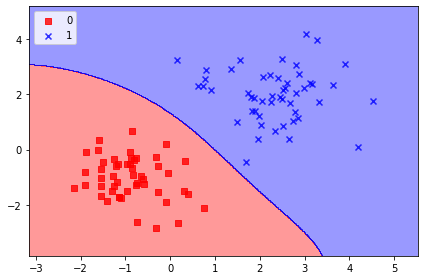

In [14]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.1, C=1)
# Train the classifier
svm.fit(X, y)

# Visualize the decision boundaries
plot_decision_regions(X, y, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()